# Sparse Hebbian Learning with full homeostasis : testing different rescaling functions

In this notebook, we test the convergence of SparseNet as a function of different parameters tuning the quantization. These parameters only influence the way we select dictionary elements and thus the homeostasis.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts.shl_experiments import SHL_set
tag = 'rescaling'
opts = dict(homeo_method='HEH', homeo_params=dict(eta_homeo=0.05, C=5., nb_quant=128, P_cum=None), verbose=1)
experiments = SHL_set(opts, tag=tag)
list_figures = ['show_dico']
list_figures = []

In [3]:
!ls -l data_cache/{tag}*

ls: data_cache/rescaling*: No such file or directory


In [4]:
homeo_params = shl.homeo_params
homeo_params

{'C': 5.0,
 'P_cum': None,
 'alpha_homeo': 0.02,
 'eta_homeo': 0.05,
 'nb_quant': 128}

We will use the ``joblib`` package do distribute this computation on different CPUs.

## different rescaling values

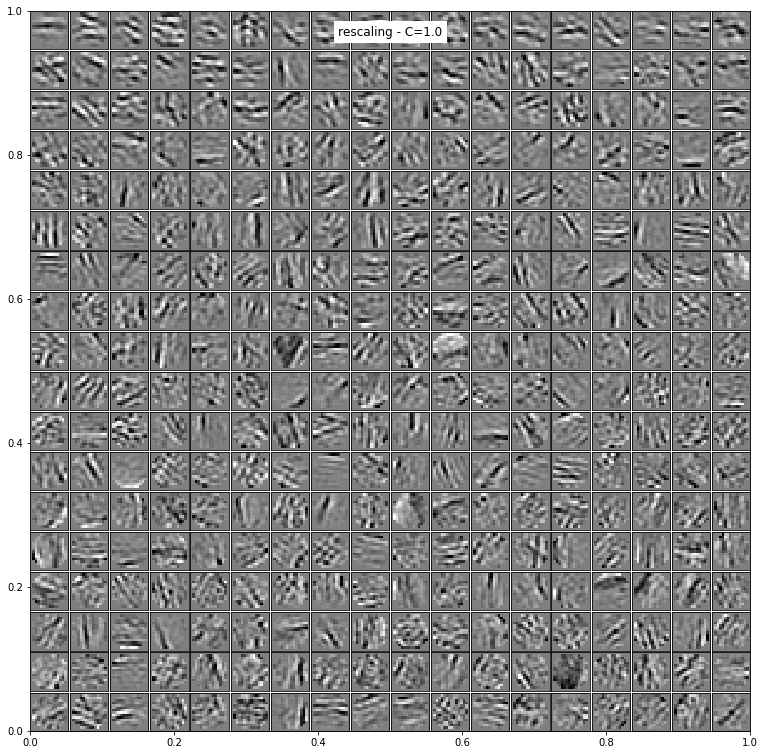

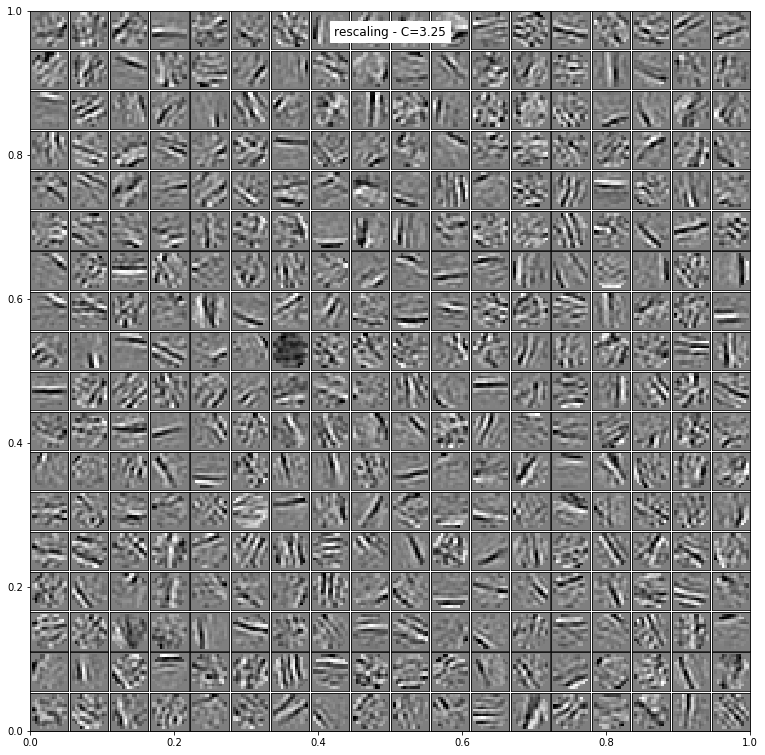

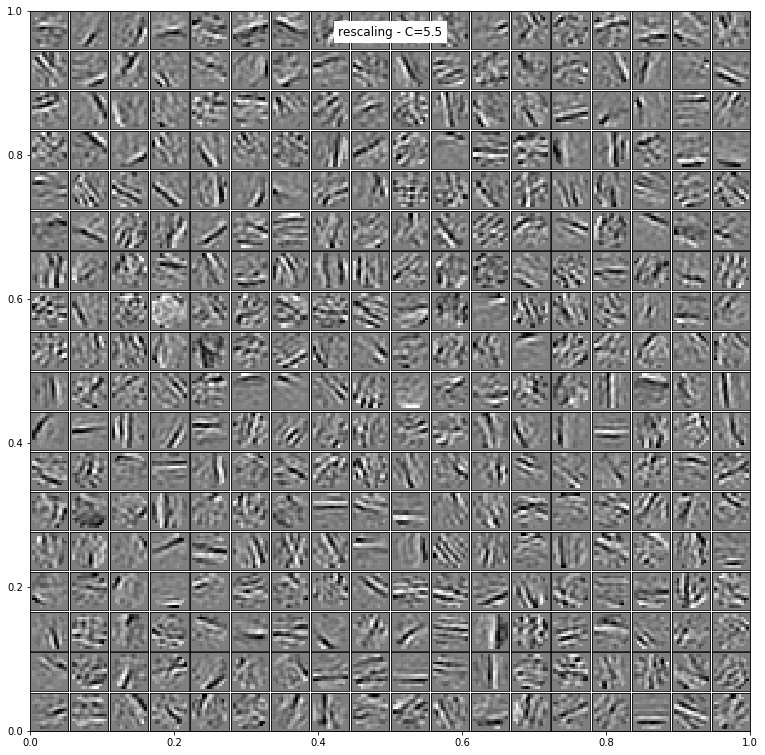

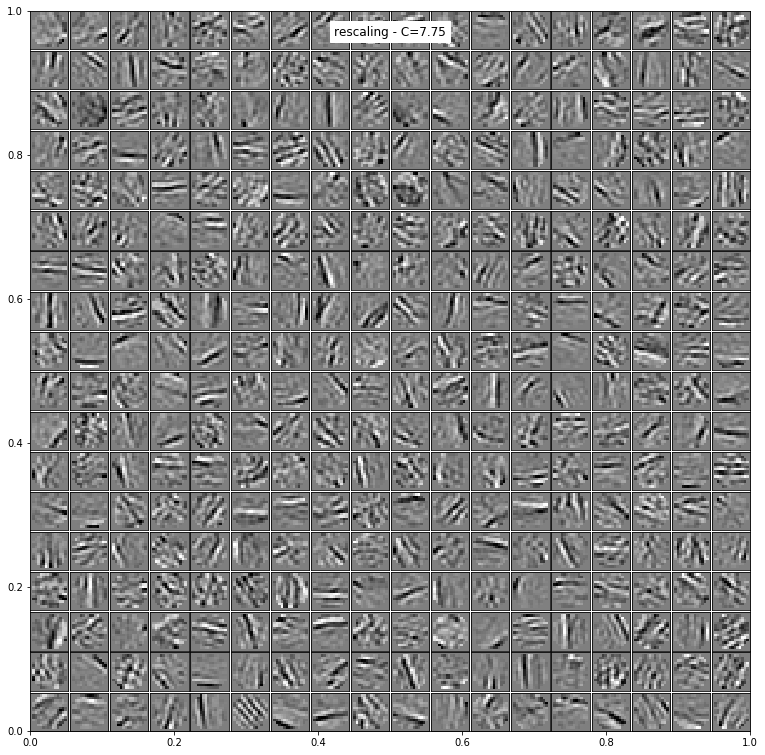

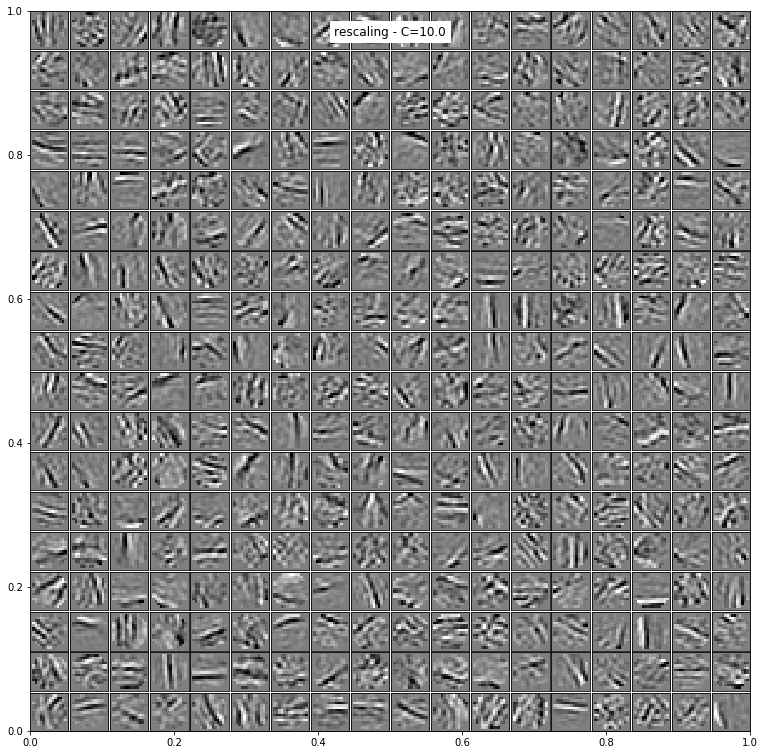

In [ ]:
experiments.scan(vtype='homeo_params', variable='C', list_figures=list_figures, display='')
fig, ax = experiments.scan(vtype='homeo_params', variable='C', list_figures=['show_dico'], display='final')

## different quantization parameters

with a fixed $C=5.$

In [ ]:
experiments.scan(vtype='homeo_params', variable='nb_quant', list_figures=list_figures, display='')
fig, ax = experiments.scan(vtype='homeo_params', variable='nb_quant', list_figures=['show_dico'], display='final')

with an adaptive rescaling function ($C=0.$)

## Version used

In [ ]:
%load_ext version_information
%version_information numpy, shl_scripts